# What factors influences the doubling rates of COVID-19 cases in cities of Metro Manila?

In this project, the trend that I am interested in analyzing is the doubling rate of cases . The four main aspects that I want to investigate in this project as factors affecting the curve of cases are the following: 

(1)Population density- The population density of a city is a good indicator of the ease or challenges of doing physical distancing in the city.  A densely populated community, for instance, may mean difficulty in home quarantining or more possibility for close contacts with a case.

(2)Measures of poverty- Lack of means to shop for essential needs is one of the reason why people break the quarantine protocols. I am interested to know if the poverty incidence is a factor in the spread of the virus.

(3)Financial capacity of the local government- Different local authorities have different financial capacity to aid to their residents. I am interested to know if financial capacity has any effect in controlling growth in cases. 

(4)Number of asymptomatic cases- The number of confirmed asymptomatic cases are also a possible indication why the virus is spreading undetected.

(5)Essential shopping venues- Shopping areas are possible transmission points as people still converge in these areas while on ECQ


### Data exploration and processing of COVID-19 cases data from DOH  data drop

The first step is to install the necessary libraries for data exploration and processing.

In [1]:
%matplotlib inline 
import pandas as pd
import numpy as np
import random
import sys
import scipy
from datetime import date
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator
from matplotlib import cm
mpl.style.use(['ggplot'])


#print(plt.style.available)

Next is look at the quality of the variables.  The csv data used for COVID19 cases in the Philippines is also in my github page.

In [2]:
df_raw=pd.read_csv("DOH COVID Data Drop_ 20200507 - 05 Case Information.csv")
df_raw.head()

,CaseCode,Age,AgeGroup,Sex,DateRepConf,DateDied,DateRecover,RemovalType,DateRepRem,Admitted,RegionRes,ProvRes,CityMunRes,RegionPSGC,ProvPSGC,CityMuniPSGC,HealthStatus,Quarantined
0,C100119,31.0,30 to 34,Male,2020-04-12,NaN,NaN,NaN,NaN,Yes,NCR,NCR,City Of Parañaque,PH130000000,PH137600000,PH137604000,Asymptomatic,No
1,C100264,58.0,55 to 59,Male,2020-03-29,NaN,NaN,NaN,NaN,No,NCR,NCR,City Of Mandaluyong,PH130000000,PH137400000,PH137401000,Mild,NaN
2,C100648,34.0,30 to 34,Female,2020-04-16,NaN,NaN,NaN,NaN,No,NCR,NCR,Quezon City,PH130000000,PH137400000,PH137404000,Mild,Yes
3,C100660,43.0,40 to 44,Female,2020-04-02,NaN,2020-04-26,NaN,NaN,Yes,NCR,NCR,City Of Pasig,PH130000000,PH137400000,PH137403000,Asymptomatic,Yes
4,C100776,43.0,40 to 44,Male,2020-04-01,NaN,NaN,NaN,NaN,NaN,Region IV-A: CALABARZON,Laguna,Pila,PH040000000,PH043400000,PH043422000,Mild,NaN


To get an overview of the growth in cases in the whole Philippines not just Metro Manila, let us look at the growth of cases, death and recoveries in the whole country. Below is the table aggregating cases, death, and recoveries by date.

In [3]:
#Covert some variables into date format
#df_raw['DateRepConf'] = pd.to_datetime(df_raw['DateRepConf'],format='%Y-%m-%d')
#df_raw['DateRecover'] = pd.to_datetime(df_raw['DateRecover'],format='%Y-%m-%d')
#df_raw['DateDied'] = pd.to_datetime(df_raw['DateDied'],format='%Y-%m-%d')
#df_raw['DateRepRem'] = pd.to_datetime(df_raw['DateRepRem'],format='%Y-%m-%d')

df_stat= pd.pivot_table(df_raw, values=['CaseCode', 'DateDied','DateRecover'], index=['DateRepConf'],aggfunc='count').cumsum()
df_stat = df_stat.rename(columns={'CaseCode':'Total Confirmed Cases', 'DateDied':'Total Confirmed Deaths','DateRecover':'Total Confirmed Recoveries'})
df_stat.head()

,Total Confirmed Cases,Total Confirmed Deaths,Total Confirmed Recoveries
DateRepConf,,,
2020-01-30,1,0,0
2020-02-03,2,1,0
2020-02-05,3,1,1
2020-03-06,5,2,1
2020-03-07,6,3,1


To look at the trend in data, let us line plot cases, deaths and recoveries in one figure.

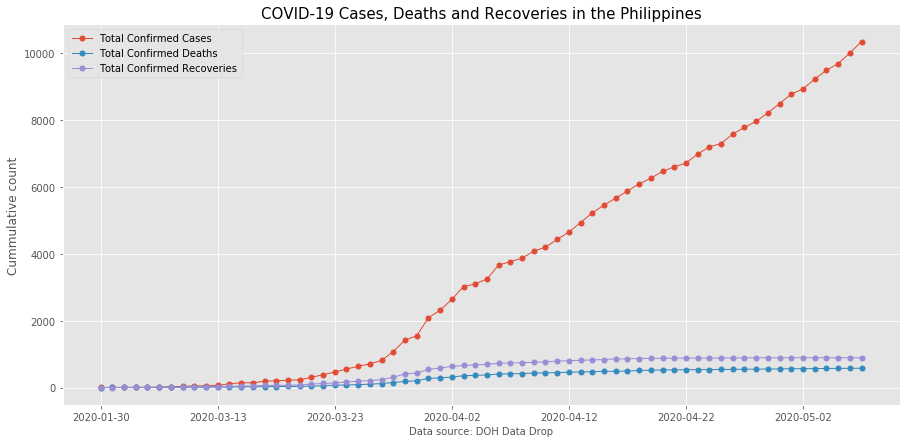

In [4]:
df_stat.plot(kind='line', 
             stacked=False,
             figsize=((15,7)),
             linewidth=1,
             marker='o',
            markersize=5)

plt.title("COVID-19 Cases, Deaths and Recoveries in the Philippines", fontsize=15)
plt.ylabel("Cummulative count", fontsize=12)
plt.xlabel("Data source: DOH Data Drop", fontsize=10)
plt.show()

Let us now look at the breakdown of confirmed cases per region. First let us transform the data to get breakdown of cases per region.

In [5]:
df_region= pd.crosstab(df_raw.DateRepConf, df_raw.RegionRes, margins=False).cumsum()
df_region=df_region[['Region I: Ilocos Region','Region II: Cagayan Valley','Region III: Central Luzon','NCR','Region IV-A: CALABARZON','Region IV-B: MIMAROPA','Region V: Bicol Region','Region VI: Western Visayas','Region VII: Central Visayas','Region VIII: Eastern Visayas','Region IX: Zamboanga Peninsula','Region X: Northern Mindanao','Region XI: Davao Region','Region XII: SOCCSKSARGEN','CARAGA','BARMM']]
df_region.head()

RegionRes,Region I: Ilocos Region,Region II: Cagayan Valley,Region III: Central Luzon,NCR,Region IV-A: CALABARZON,Region IV-B: MIMAROPA,Region V: Bicol Region,Region VI: Western Visayas,Region VII: Central Visayas,Region VIII: Eastern Visayas,Region IX: Zamboanga Peninsula,Region X: Northern Mindanao,Region XI: Davao Region,Region XII: SOCCSKSARGEN,CARAGA,BARMM
DateRepConf,,,,,,,,,,,,,,,,
2020-01-30,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
2020-02-03,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0
2020-02-05,0,0,0,0,0,0,0,0,3,0,0,0,0,0,0,0
2020-03-06,0,0,0,1,1,0,0,0,3,0,0,0,0,0,0,0
2020-03-07,0,0,0,1,2,0,0,0,3,0,0,0,0,0,0,0


Let us visualize the data using stacked area plot. We will see in the chart that the concentration in the number of cases is in the National Capital Region or Metro Manila.

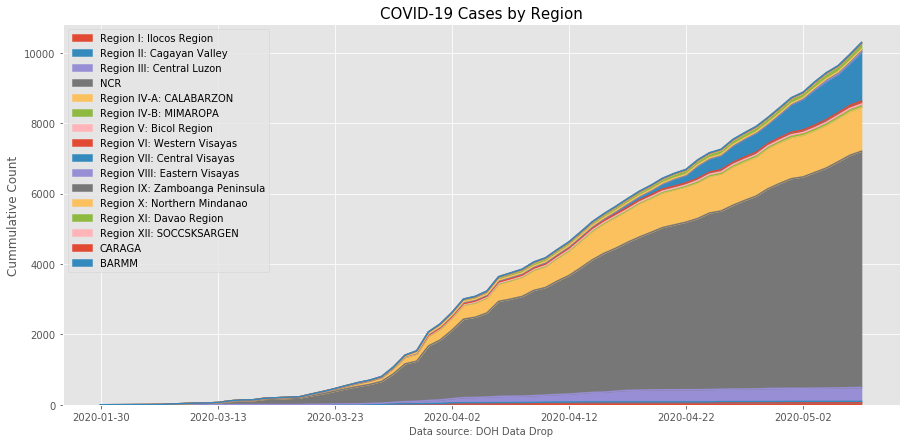

In [6]:
df_region.plot(kind='area', 
             stacked=True,
             figsize=(15,7))

plt.title("COVID-19 Cases by Region", fontsize=15)
plt.ylabel("Cummulative Count", fontsize=12)
plt.xlabel("Data source: DOH Data Drop", fontsize=10)
plt.legend(loc="upper left")

plt.show()

### Processing the NCR data to get doubling rate per city

The codes below will limit the data to NCR.  It will also eliminate data where the city of residence is still for verifcation, and those that are mistakenly attributed to NCR.

In [7]:
df_NCRcities = df_raw.loc[df_raw['RegionRes'] == 'NCR']
df_NCRcities = df_NCRcities.rename(columns={"CityMunRes":"City"})

df_NCRcities=df_NCRcities[df_NCRcities.City != "City Of Antipolo (Capital)"]
df_NCRcities=df_NCRcities[df_NCRcities.City != "San Francisco (Aurora)"]         
df_NCRcities=df_NCRcities[df_NCRcities.City != "Bacnotan"] 
df_NCRcities=df_NCRcities[df_NCRcities.City != "For Validation"]
                         
df_NCRcities.fillna(0)
df_NCRcities.head()

,CaseCode,Age,AgeGroup,Sex,DateRepConf,DateDied,DateRecover,RemovalType,DateRepRem,Admitted,RegionRes,ProvRes,City,RegionPSGC,ProvPSGC,CityMuniPSGC,HealthStatus,Quarantined
0,C100119,31.0,30 to 34,Male,2020-04-12,NaN,NaN,NaN,NaN,Yes,NCR,NCR,City Of Parañaque,PH130000000,PH137600000,PH137604000,Asymptomatic,No
1,C100264,58.0,55 to 59,Male,2020-03-29,NaN,NaN,NaN,NaN,No,NCR,NCR,City Of Mandaluyong,PH130000000,PH137400000,PH137401000,Mild,NaN
2,C100648,34.0,30 to 34,Female,2020-04-16,NaN,NaN,NaN,NaN,No,NCR,NCR,Quezon City,PH130000000,PH137400000,PH137404000,Mild,Yes
3,C100660,43.0,40 to 44,Female,2020-04-02,NaN,2020-04-26,NaN,NaN,Yes,NCR,NCR,City Of Pasig,PH130000000,PH137400000,PH137403000,Asymptomatic,Yes
5,C100829,54.0,50 to 54,Male,2020-05-05,NaN,NaN,NaN,NaN,NaN,NCR,NCR,Pasay City,PH130000000,PH137600000,PH137605000,Mild,NaN


The code below will result to a  cummulative COVID-19 cases in the NCR chart by city.

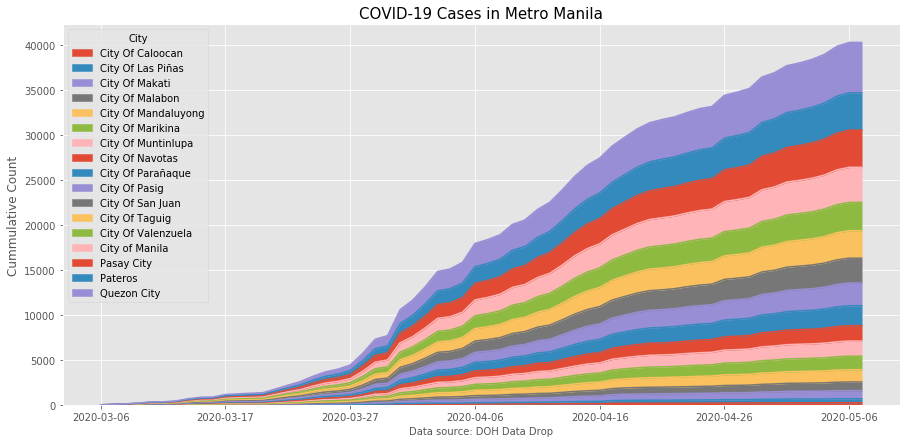

In [8]:
df_NCRchart=pd.crosstab(df_NCRcities.DateRepConf,df_NCRcities.City,margins=False).cumsum(axis=1).cumsum()

df_NCRchart.plot(kind='area',
                 stacked=True,
                 figsize=(15,7))

plt.title("COVID-19 Cases in Metro Manila", fontsize=15)
plt.ylabel("Cummulative Count", fontsize=12)
plt.xlabel("Data source: DOH Data Drop", fontsize=10)

plt.show()

### Visualization and computation of doubling rate per city

First, make a dataframe where the city names are the index. This file is written in a csv file for graphing later.

In [9]:
df_NCRcases=pd.crosstab( df_NCRcities.City,df_NCRcities.DateRepConf,margins=False).cumsum(axis=1)
df_NCRcases.to_csv('NCRcovid-19-cases.csv')
df_NCRcases.head()

DateRepConf,2020-03-06,2020-03-08,2020-03-09,2020-03-10,2020-03-11,2020-03-12,2020-03-13,2020-03-14,2020-03-15,2020-03-16,...,2020-04-28,2020-04-29,2020-04-30,2020-05-01,2020-05-02,2020-05-03,2020-05-04,2020-05-05,2020-05-06,2020-05-07
City,,,,,,,,,,,,,,,,,,,,,
City Of Caloocan,0,0,0,0,0,0,0,2,3,3,...,205,211,215,222,223,224,224,234,236,236
City Of Las Piñas,0,0,0,0,1,1,1,1,2,3,...,168,182,184,195,198,199,199,200,200,200
City Of Makati,0,1,2,3,8,8,11,15,15,16,...,413,425,431,435,438,441,455,464,471,471
City Of Malabon,0,0,0,0,0,0,0,0,0,0,...,40,42,44,46,46,47,47,49,58,58
City Of Mandaluyong,0,0,0,0,1,2,2,5,8,8,...,384,394,396,397,399,400,400,404,404,404


This is the dataframe for population if it is case number needs to be normalized according to population. 

In [10]:
df_pop = pd.read_csv("NCR_full.csv")
df_pop=df_pop.rename(columns={"CityMunRes":"City"})
df_pop= df_pop.set_index('City')
populations = df_pop[['Pop']]
populations.head()

,Pop
City,
City Of Caloocan,1583978
City Of Las Piñas,588894
City Of Makati,582602
City Of Malabon,365525
City Of Mandaluyong,386276


In the following code the doubing rates of the cases in Metro Manila will be line plotted to visualize the growth of cases in each city in Metro Manila. The following code is based on a code shared in this site by :
    https://scipython.com/blog/plotting-covid-19-case-growth-charts/

In [11]:
#mimimum number of cases that determines initial number
MIN_CASES = 1
#maximum number of days after the first case
MAX_DAYS = 65
#assign the pre-saved csv file to a variable
data_loc = 'NCRcovid-19-cases.csv'

#Type of chart
PLOT_TYPE='confirmed cases'

df = pd.read_csv('NCRcovid-19-cases.csv')
df = df.set_index('City')
df.head()

,2020-03-06,2020-03-08,2020-03-09,2020-03-10,2020-03-11,2020-03-12,2020-03-13,2020-03-14,2020-03-15,2020-03-16,...,2020-04-28,2020-04-29,2020-04-30,2020-05-01,2020-05-02,2020-05-03,2020-05-04,2020-05-05,2020-05-06,2020-05-07
City,,,,,,,,,,,,,,,,,,,,,
City Of Caloocan,0,0,0,0,0,0,0,2,3,3,...,205,211,215,222,223,224,224,234,236,236
City Of Las Piñas,0,0,0,0,1,1,1,1,2,3,...,168,182,184,195,198,199,199,200,200,200
City Of Makati,0,1,2,3,8,8,11,15,15,16,...,413,425,431,435,438,441,455,464,471,471
City Of Malabon,0,0,0,0,0,0,0,0,0,0,...,40,42,44,46,46,47,47,49,58,58
City Of Mandaluyong,0,0,0,0,1,2,2,5,8,8,...,384,394,396,397,399,400,400,404,404,404


In [12]:
def make_comparison_plot(cities, normalize=False):

    # Extract the Series corresponding to the case numbers for cities
    c_df = df.loc[cities, df.columns[1:]].astype(int)   

    # Discard any columns with fewer than MIN_CASES.
    c_df = c_df[c_df >= MIN_CASES]

    if normalize:
        # Calculate confirmed case numbers per 1,000,000 population.
        c_df  = c_df.div(self,populations.loc[cities], axis='index') * 1000
    # Rearrange DataFrame to give countries in columns and number of days since
    # MIN_CASES in rows.
    c_df = c_df.T.apply(lambda e: pd.Series(e.dropna().values))

    # Truncate the DataFrame after the maximum number of days to be considered.
    c_df = c_df.truncate(after=MAX_DAYS-1)
    marker = ['+', 'o', '*','X','D','P','>','<','1']
    
    # Plot the data.
    fig = plt.figure(figsize=[20, 12] )
    ax = fig.add_subplot()
    for city, ser in c_df.iteritems():
        
        ax.plot(range(len(ser)), np.log10(ser.values), label=city, linewidth=1, marker=random.choice(marker),markersize=10, alpha=.7)      
    
    if not normalize:
        # Set the tick marks and labels for the absolute data.
        ymin = int(np.log10(MIN_CASES))
        ymax = int(np.log10(np.nanmax(c_df))) + 1
        yticks = np.linspace(ymin, ymax, ymax-ymin+1, dtype=int)
        yticklabels = [str(10**y) for y in yticks]
        ax.set_yticks(yticks)
        ax.set_yticklabels(yticklabels)
        ax.set_ylim(ymin, ymax)
        ax.set_ylabel(f'Number of {PLOT_TYPE}', fontsize=15)
        
    else:
        # Set the tick marks and labels for the per 1,000,000 population data.
        ax.set_ylim(np.log10(np.nanmin(c_df)), np.log10(np.nanmax(c_df)))
        ax.set_ylabel(f'Number of {PLOT_TYPE} per 1,000 population', fontsize=15)

    # Label the x-axis
    ax.set_xlim(0, MAX_DAYS)
    today = str(date.today())
    
    ax.set_xlabel(f'Number of days since first death (Data source: DOH, accessed on {today})',fontsize=15)
    ax.set_xlabel(f'Number of days since first death (Data source: DOH, accessed on {today})',fontsize=15)
    
    def plot_threshold_lines(doubling_lifetime):
        """Add a line for the growth in numbers at a given doubling lifetime."""

        # Find the limits of the line for the current plot region.
        x = np.array([0, MAX_DAYS])
        y = np.log10(MIN_CASES) + x/doubling_lifetime * np.log10(2)
        ymin, ymax = ax.get_ylim()
        if y[1] > ymax:
            y[1] = ymax
            x[1] = doubling_lifetime/np.log10(2) * (y[1] - np.log10(MIN_CASES))
        ax.plot(x, y, ls='--', color='#aaaaaa')

        # The reason this matters is that we want to label the line at its
        # centre, rotated appropriately.
        s = f'Doubling every {doubling_lifetime} days'
        p1 = ax.transData.transform_point((x[0], y[0]))
        p2 = ax.transData.transform_point((x[1], y[1]))
        xylabel = ((x[0]+x[1])/2, (y[0]+y[1])/2)

        dy = (p2[1] - p1[1])
        dx = (p2[0] - p1[0])
        angle = np.degrees(np.arctan2(dy, dx))
        ax.annotate(s, xy=xylabel, ha='center', va='center', rotation=angle, fontsize=15)

    if not normalize:
        # If we're plotting absolute numbers, indicate the doubling time.
        plot_threshold_lines(2)
        plot_threshold_lines(3)
        plot_threshold_lines(5)
        plot_threshold_lines(10)

    ax.legend(fontsize=14)
  

cities= ['City Of Caloocan','City Of Las Piñas','City Of Makati','City Of Malabon',
         'City Of Mandaluyong','City Of Marikina','City Of Muntinlupa','City Of Navotas','City Of Parañaque',
         'City Of Pasig','City Of San Juan','City Of Taguig','City Of Valenzuela','City of Manila',
         'Pasay City','Pateros','Quezon City']


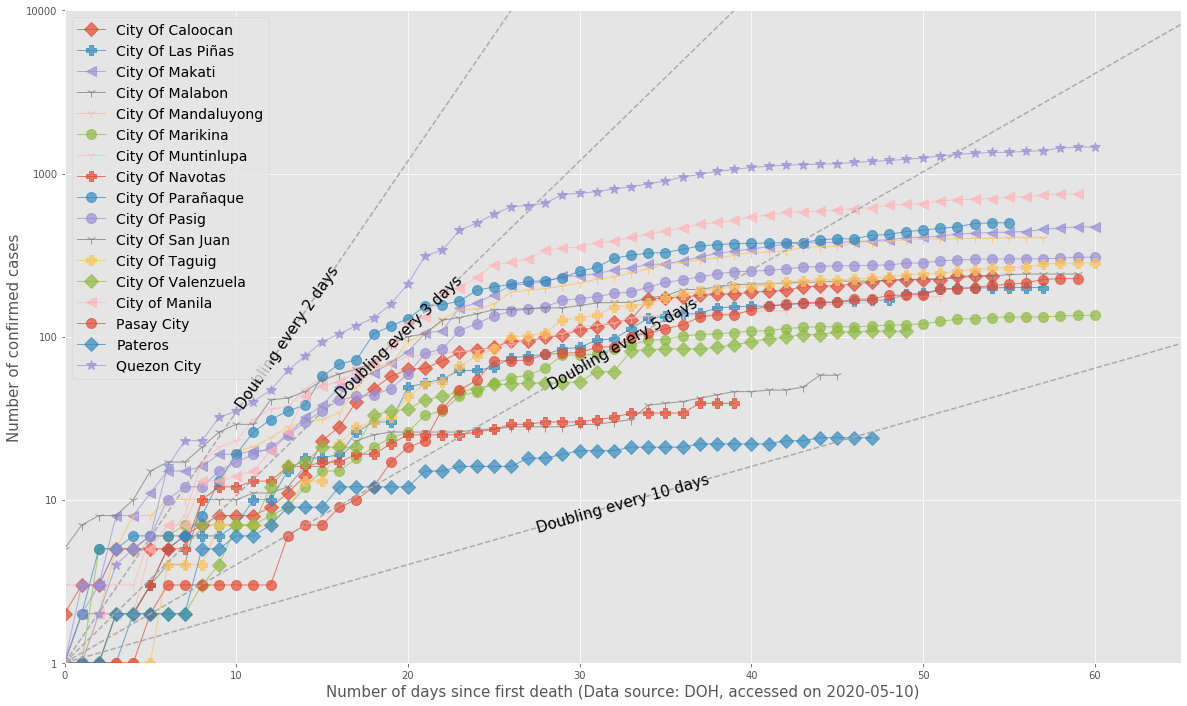

In [13]:
make_comparison_plot(cities, normalize=False)
plt.show()

### Compute the days from first case and the doubling rate from the first case per city

In [14]:
df_NCRcases['MaxDays']=(df_NCRcases > 0).sum(axis=1)
df_NCRcases['DT'] = df_NCRcases['MaxDays']*np.log(2) / np.log(df_NCRcases['2020-05-07'])
df_NCRcases.sort_index(ascending=True)
df_NCRcases=df_NCRcases[['MaxDays','DT']]
df_NCRcases.head()

DateRepConf,MaxDays,DT
City,,
City Of Caloocan,55,6.977355
City Of Las Piñas,58,7.587793
City Of Makati,61,6.869692
City Of Malabon,46,7.852535
City Of Mandaluyong,58,6.698843


### Compute the percent of asymptotic patients per city

In [15]:
df_asym=pd.crosstab(df_NCRcities.City, df_NCRcities.HealthStatus)
df_asym.loc[:,'Row_Total'] = df_asym.sum(numeric_only=True, axis=1)
df_asym['Per_asym']=df_asym['Asymptomatic']/df_asym['Row_Total']
df_asym.head()

HealthStatus,Asymptomatic,Critical,Died,Mild,Recovered,Severe,Row_Total,Per_asym
City,,,,,,,,
City Of Caloocan,29,0,22,155,29,1,236,0.122881
City Of Las Piñas,14,2,11,129,43,1,200,0.070000
City Of Makati,64,3,28,253,121,2,471,0.135881
City Of Malabon,4,0,4,44,6,0,58,0.068966
City Of Mandaluyong,55,2,32,254,55,6,404,0.136139


### Read other variables like coordinates, Population, Population Density, Poverty Incidence, Number of Poor Families, and Net Income of cities

In [16]:
df_all = pd.read_csv("NCR_full.csv")
df_all = df_all.set_index('City').sort_index(ascending=True)
df_all.head()

,latitude,longitude,Pop,Popden,Area,pov_incidence,poor_families,net_income,net_income_pop
City,,,,,,,,,
City Of Caloocan,14.649228,120.982589,1583978,28.29,56.0,3.2,12.0,266026,0.167948
City Of Las Piñas,14.444500,120.993900,588894,18.40,32.0,1.0,2.0,596218,1.012437
City Of Makati,14.550106,121.036017,582602,21.58,27.0,0.2,0.0,4737265,8.131220
City Of Malabon,14.669098,120.971958,365525,22.85,16.0,1.3,1.0,174302,0.476854
City Of Mandaluyong,14.579400,121.035900,386276,35.12,11.0,0.9,1.0,894869,2.316657


### Getting the number of essential facilities per city from foursquare

First, import and load the necessary libraries.

In [17]:
import json 

!conda install -c conda-forge geopy --yes
from geopy.geocoders import Nominatim

import requests
from pandas.io.json import json_normalize

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

# import k-means from clustering stage
from sklearn.cluster import KMeans

#!conda install -c conda-forge folium=0.5.0 --yes # uncomment this line if you haven't completed the Foursquare API lab
import folium # map rendering library

print('Libraries imported.')

Solving environment: done

# All requested packages already installed.

Libraries imported.


Determine and designete the dataframe of the coordinates of the cities.

In [18]:
NCR_data=df_all[['latitude','longitude']]
NCR_data.reset_index(inplace=True)
NCR_data.head()

,City,latitude,longitude
0,City Of Caloocan,14.649228,120.982589
1,City Of Las Piñas,14.444500,120.993900
2,City Of Makati,14.550106,121.036017
3,City Of Malabon,14.669098,120.971958
4,City Of Mandaluyong,14.579400,121.035900


Check the coodinates of Metro Manila and the cities in consideration.

In [19]:
address = 'Metro Manila'

geolocator = Nominatim(user_agent="mm_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Metro Manila are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of Metro Manila are 14.5736108, 121.0329706.


In [20]:
# create map of New York using latitude and longitude values
map_NCR = folium.Map(location=[latitude, longitude], zoom_start=10)
map_NCR

#add markers to map
for lat, lng, city in zip(NCR_data['latitude'], NCR_data['longitude'], NCR_data['City']):
    label = '{}'.format(city)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_NCR)  
    
map_NCR

Now, we will call Foursquare API to derive json file of venues in Metro Manila by cities.

In [21]:
CLIENT_ID = 'ENIFXKDPHIGWMJI3JTGBPCZCPL3HHRU35QMJEEXHC2KYNAPO' # your Foursquare ID
CLIENT_SECRET = 'D1Q5W0SDTCHNXM3TH2LAAZ0YQC13LREL2DBLYGXAXCIRW2Y4' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: ENIFXKDPHIGWMJI3JTGBPCZCPL3HHRU35QMJEEXHC2KYNAPO
CLIENT_SECRET:D1Q5W0SDTCHNXM3TH2LAAZ0YQC13LREL2DBLYGXAXCIRW2Y4


In [22]:
LIMIT=1000
def getNearbyVenues(names, latitudes, longitudes, radius=5000):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
         
        #create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['City', 
                  'Latitude', 
                  'Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [23]:
NCR_venues = getNearbyVenues(names=NCR_data['City'],
                             latitudes=NCR_data['latitude'],
                             longitudes=NCR_data['longitude']
                            )


City Of Caloocan
City Of Las Piñas
City Of Makati
City Of Malabon
City Of Mandaluyong
City Of Marikina
City Of Muntinlupa
City Of Navotas
City Of Parañaque
City Of Pasig
City Of San Juan
City Of Taguig
City Of Valenzuela
City of Manila
Pasay City
Pateros
Quezon City


In [24]:
print(NCR_venues.shape)
NCR_venues.head()

(1649, 7)


,City,Latitude,Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,City Of Caloocan,14.649228,120.982589,9th Avenue Pares House,14.650172,120.983533,Diner
1,City Of Caloocan,14.649228,120.982589,Angels Town Cafe,14.649591,120.984536,Café
2,City Of Caloocan,14.649228,120.982589,Mabini Bakeshop,14.654097,120.972308,Bakery
3,City Of Caloocan,14.649228,120.982589,Jollibee,14.650396,120.984080,Fast Food Restaurant
4,City Of Caloocan,14.649228,120.982589,Pares Retiro,14.627408,120.992839,Filipino Restaurant


In [25]:
NCR_venues.to_csv('NCRallvenues_final.csv') #just to backup

Now let us visualize the venues derived from Foursquare in a map.

In [26]:
#NCR_venues=NCR_savedvenues
map_NCRvenues = folium.Map(location=[latitude, longitude], zoom_start=10)

# add markers to map
for lat, lng, venue in zip(NCR_venues['Venue Latitude'], NCR_venues['Venue Longitude'], NCR_venues['Venue'], ):
    label = '{}'.format(venue)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=1,
        popup=label,
        color='orange',
        fill=True,
        fill_color='orange',
        fill_opacity=0.5,
        parse_html=False).add_to(map_NCRvenues)  
    
map_NCRvenues

Let us now review the venue categories that may factor in the essential.

In [27]:
Venue_categories=NCR_venues.groupby(NCR_venues['Venue Category']).count()
Venue_categories.head()

,City,Latitude,Longitude,Venue,Venue Latitude,Venue Longitude
Venue Category,,,,,,
Accessories Store,1,1,1,1,1,1
Airport,1,1,1,1,1,1
American Restaurant,4,4,4,4,4,4
Antique Shop,1,1,1,1,1,1
Arcade,6,6,6,6,6,6


Based on initial data examination it seems that only the venues categories Supermarket, Market, Farmers Market, and Grocery Store are the essential venues that people converge in during the quarantine. In the next lines, the number of these essential venues will be tallied per city.

In [28]:
NCR_venues
NCR_onehot = pd.get_dummies(NCR_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
NCR_onehot['City'] = NCR_venues['City'] 

# move neighborhood column to the first column
fixed_columns = [NCR_onehot.columns[-1]] + list(NCR_onehot.columns[:-1])
NCR_onehot = NCR_onehot[fixed_columns]

NCR_onehot.head()

,City,Accessories Store,Airport,American Restaurant,Antique Shop,Arcade,Art Gallery,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,...,Thai Restaurant,Theater,Theme Park,Tonkatsu Restaurant,Video Game Store,Vietnamese Restaurant,Whisky Bar,Wine Bar,Wings Joint,Yoga Studio
0,City Of Caloocan,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,City Of Caloocan,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,City Of Caloocan,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,City Of Caloocan,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,City Of Caloocan,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [29]:
NCR_onehot.shape

(1649, 171)

In [30]:
NCR_grouped = NCR_onehot.groupby('City').sum()
NCR_grouped.head()

,Accessories Store,Airport,American Restaurant,Antique Shop,Arcade,Art Gallery,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,Australian Restaurant,...,Thai Restaurant,Theater,Theme Park,Tonkatsu Restaurant,Video Game Store,Vietnamese Restaurant,Whisky Bar,Wine Bar,Wings Joint,Yoga Studio
City,,,,,,,,,,,,,,,,,,,,,
City Of Caloocan,0,0,0,0,1,0,0,5,0,0,...,0,0,0,0,0,0,0,0,1,0
City Of Las Piñas,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,1,0
City Of Makati,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,1,1,1,0,2
City Of Malabon,0,0,0,0,1,0,0,5,0,0,...,0,0,0,0,0,0,0,0,1,0
City Of Mandaluyong,0,0,0,0,0,0,1,0,0,0,...,1,0,0,0,0,0,0,1,0,4


In [31]:
NCR_essential=NCR_grouped[['Farmers Market','Supermarket','Grocery Store', 'Market']]
NCR_essential['Ess_venues']=NCR_essential.sum(axis=1)
NCR_essential.head()

/Users/michelle/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,Farmers Market,Supermarket,Grocery Store,Market,Ess_venues
City,,,,,
City Of Caloocan,0,3,1,0,4
City Of Las Piñas,0,1,0,1,2
City Of Makati,0,2,1,0,3
City Of Malabon,0,2,0,0,2
City Of Mandaluyong,0,3,0,0,3


### Preparing the data for analysis

First, the data to explain the assumed factors affecting doubling rate are merged. This dataframe will now be the subject of analysis.

In [71]:
df_doubling = df_NCRcases[['MaxDays','DT']]
df_perasym =df_asym[['Per_asym']]
df_ess=NCR_essential[['Ess_venues']]

df_cp = pd.merge( df_all, df_doubling,  how='inner', on='City')
df_cp = pd.merge( df_cp, df_perasym, how='inner', on='City')
df_cp = pd.merge( df_cp, df_ess, how='inner', on='City')
df_cp.drop(['latitude','longitude','MaxDays'], axis=1, inplace=True)
df_cp 

,Pop,Popden,Area,pov_incidence,poor_families,net_income,net_income_pop,DT,Per_asym,Ess_venues
City,,,,,,,,,,
City Of Caloocan,1583978,28.29,56.0,3.2,12.0,266026,0.167948,6.977355,0.122881,4
City Of Las Piñas,588894,18.40,32.0,1.0,2.0,596218,1.012437,7.587793,0.070000,2
City Of Makati,582602,21.58,27.0,0.2,0.0,4737265,8.131220,6.869692,0.135881,3
City Of Malabon,365525,22.85,16.0,1.3,1.0,174302,0.476854,7.852535,0.068966,2
City Of Mandaluyong,386276,35.12,11.0,0.9,1.0,894869,2.316657,6.698843,0.136139,3
City Of Marikina,450741,19.60,23.0,1.5,2.0,258655,0.573844,8.619696,0.111111,0
City Of Muntinlupa,504509,12.01,42.0,0.8,1.0,908322,1.800408,6.971041,0.068182,2
City Of Navotas,249463,20.79,12.0,2.4,2.0,251456,1.007989,7.568014,0.179487,0
City Of Parañaque,664822,14.15,47.0,0.6,1.0,771683,1.160736,6.247981,0.168337,1


Some variables are normalized and some are dropped.

In [72]:

df_cp['ess_venues_norm'] = df_cp['Ess_venues']/df_cp['Area']
df_cp.drop(['Pop','Area'], axis=1, inplace=True)
df_cp

,Popden,pov_incidence,poor_families,net_income,net_income_pop,DT,Per_asym,Ess_venues,ess_venues_norm
City,,,,,,,,,
City Of Caloocan,28.29,3.2,12.0,266026,0.167948,6.977355,0.122881,4,0.071429
City Of Las Piñas,18.40,1.0,2.0,596218,1.012437,7.587793,0.070000,2,0.062500
City Of Makati,21.58,0.2,0.0,4737265,8.131220,6.869692,0.135881,3,0.111111
City Of Malabon,22.85,1.3,1.0,174302,0.476854,7.852535,0.068966,2,0.125000
City Of Mandaluyong,35.12,0.9,1.0,894869,2.316657,6.698843,0.136139,3,0.272727
City Of Marikina,19.60,1.5,2.0,258655,0.573844,8.619696,0.111111,0,0.000000
City Of Muntinlupa,12.01,0.8,1.0,908322,1.800408,6.971041,0.068182,2,0.047619
City Of Navotas,20.79,2.4,2.0,251456,1.007989,7.568014,0.179487,0,0.000000
City Of Parañaque,14.15,0.6,1.0,771683,1.160736,6.247981,0.168337,1,0.021277


## Exploratory analysis

Since the number of samples (17) is quite small, independent variables must be reduced to avoid overfitting in linear regression. Factor analysis will be used to limit the number of variables.

In [73]:
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
import pandas as pd

In [74]:
df_features = df_cp[['Popden','pov_incidence','poor_families','net_income_pop', 'Per_asym', 'Ess_venues']]
df_features.corr()

,Popden,pov_incidence,poor_families,net_income_pop,Per_asym,Ess_venues
Popden,1.000000,0.460340,0.343730,0.061857,-0.040868,0.288731
pov_incidence,0.460340,1.000000,0.673281,-0.374058,-0.002070,0.178821
poor_families,0.343730,0.673281,1.000000,-0.141109,0.055520,0.347557
net_income_pop,0.061857,-0.374058,-0.141109,1.000000,-0.033091,0.307738
Per_asym,-0.040868,-0.002070,0.055520,-0.033091,1.000000,-0.192652
Ess_venues,0.288731,0.178821,0.347557,0.307738,-0.192652,1.000000


Factor analysis will be performend using the factor-analyzer library

In [75]:
!pip install factor-analyzer

In [76]:
import pandas as pd
from factor_analyzer import FactorAnalyzer

fa = FactorAnalyzer(rotation=None)
fa.fit(df_features)
FactorAnalyzer(bounds=(0.005, 1), impute='median', is_corr_matrix=False,
method='minres', n_factors=4, rotation=None, rotation_kwargs={},
use_smc=True)


FactorAnalyzer(bounds=(0.005, 1), impute='median', is_corr_matrix=False,
               method='minres', n_factors=4, rotation=None, rotation_kwargs={},
               use_smc=True)

In [77]:
fa.loadings_

array([[ 0.49176438, -0.11856435,  0.16546592],
       [ 0.96509149,  0.17777017, -0.19130549],
       [ 0.72363666,  0.03083672,  0.11857437],
       [-0.22093657, -0.37749284,  0.52114288],
       [-0.05256814,  0.84744145,  0.52432211],
       [ 0.37596299, -0.46394696,  0.42598461]])

Based on the factor loadings poverty incidence (pov_incidence)  and percent of confirmed asymptotic (Per_asym) has the biggest loading in the first two factors

## Regression analysis

Below are the regression analysis of the full model and that reduced in dimension:

In [87]:
from statsmodels.api import OLS
from sklearn.preprocessing import StandardScaler

### MODEL 1

In [88]:
Xs = df_cp[['Popden','pov_incidence','poor_families','net_income_pop', 'Per_asym', 'Ess_venues']]
Y = df_cp['DT']

In [80]:
OLS(Y,Xs).fit().summary()

/Users/michelle/opt/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1535: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=17
  "anyway, n=%i" % int(n))


<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                     DT   R-squared (uncentered):                   0.948
Model:                            OLS   Adj. R-squared (uncentered):              0.920
Method:                 Least Squares   F-statistic:                              33.58
Date:                Sun, 10 May 2020   Prob (F-statistic):                    1.88e-06
Time:                        21:06:32   Log-Likelihood:                         -33.109
No. Observations:                  17   AIC:                                      78.22
Df Residuals:                      11   BIC:                                      83.22
Df Model:                           6                                                  
Covariance Type:            nonrobust                                                  
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Popden             0.1258      0.072      1.754      0.107      -0.032       0.284
pov_incidence      1.6840      1.027      1.640      0.129      -0.576       3.944
poor_families     -0.4752      0.196     -2.428      0.033      -0.906      -0.045
net_income_pop     0.0011      0.323      0.004      0.997      -0.710       0.712
Per_asym          17.6191      8.299      2.123      0.057      -0.646      35.884
Ess_venues         0.5666      0.419      1.351      0.204      -0.356       1.489
==============================================================================
Omnibus:                        1.884   Durbin-Watson:                   2.479
Prob(Omnibus):                  0.390   Jarque-Bera (JB):                1.095
Skew:                          -0.278   Prob(JB):                        0.578
Kurtosis:                       1.888   Cond. No.                         393.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### MODEL 2

In [91]:
Xs = df_cp[[ 'pov_incidence', 'Per_asym']]
#Xs = df_cp[['Popden', 'pov_incidence','net_income_norm', 'Per_asym','ess_venues_norm']]
Y = df_cp['DT']

In [92]:
OLS(Y,Xs).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                     DT   R-squared (uncentered):                   0.867
Model:                            OLS   Adj. R-squared (uncentered):              0.849
Method:                 Least Squares   F-statistic:                              48.96
Date:                Sun, 10 May 2020   Prob (F-statistic):                    2.66e-07
Time:                        21:22:46   Log-Likelihood:                         -41.121
No. Observations:                  17   AIC:                                      86.24
Df Residuals:                      15   BIC:                                      87.91
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
pov_incidence     1.9549      0.766      2.552      0.022       0.322       3.587
Per_asym         34.4363      8.971      3.839      0.002      15.316      53.557
==============================================================================
Omnibus:                        3.002   Durbin-Watson:                   1.722
Prob(Omnibus):                  0.223   Jarque-Bera (JB):                1.347
Skew:                          -0.294   Prob(JB):                        0.510
Kurtosis:                       1.753   Cond. No.                         19.2
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [83]:
# import the visualization package: seaborn
import seaborn as sns
%matplotlib inline 

(0, 10.79513004825044)

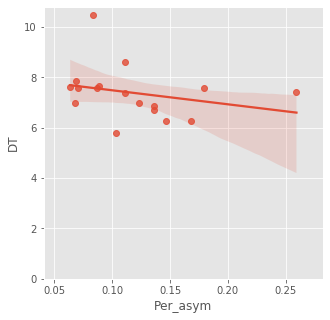

In [84]:
width = 5
height = 5
plt.figure(figsize=(width, height))
sns.regplot(x="Per_asym", y="DT", data=df_cp)
plt.ylim(0,)

(0, 10.715468787223484)

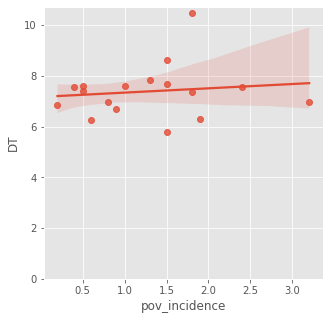

In [85]:
width = 5
height = 5
plt.figure(figsize=(width, height))
sns.regplot(x="pov_incidence", y="DT", data=df_cp)
plt.ylim(0,)